# Latent Discriminant Analysis (LDA)

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets

In [2]:
iris = sklearn.datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
len(iris.target)

150

In [6]:
dct = {'0':'setosa', '1':'versicolor','2':'virginica'}
list_iris = [dct[str(k)] for k in iris.target]


In [7]:
df_iris['Class'] = list_iris
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
X = df_iris.iloc[:, 0:4].values
y = df_iris.iloc[:, 4].values

In [9]:
# Test Train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

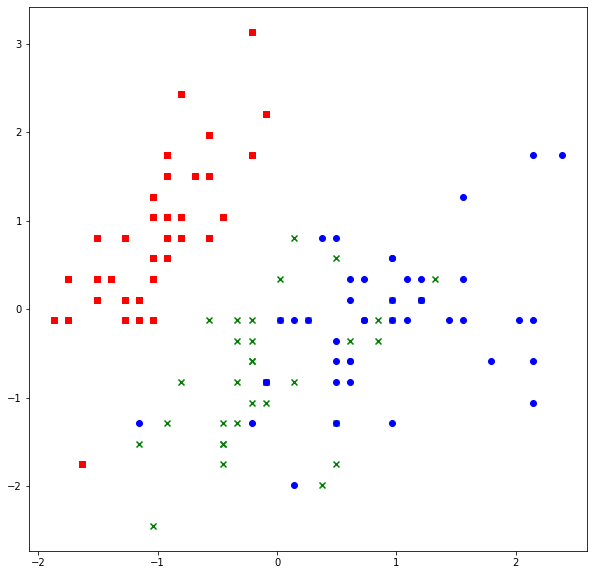

In [11]:
import matplotlib.pyplot as plt
markers = ['s','x','o']
colors = ['r','g','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
  ax0.scatter(X_train[:,0][y_train==l],X_train[:,1][y_train==l],c=c,marker=m)

Performing LDA

In [12]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_post_lda = lda.fit_transform(X_train, y_train)
X_test_post_lda = lda.transform(X_test)

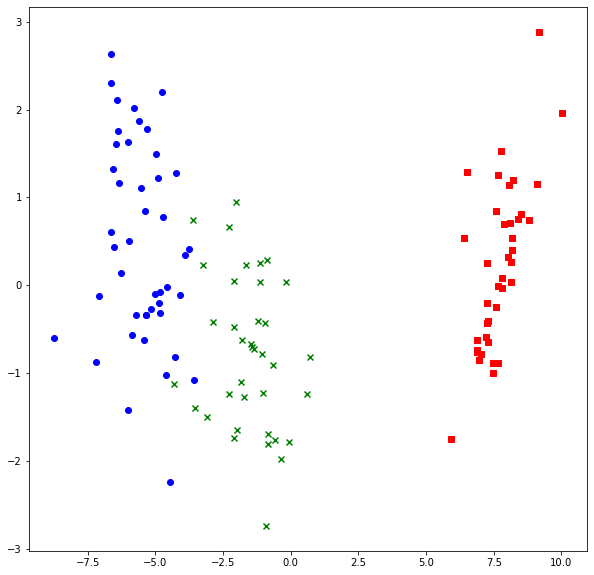

In [13]:
# Visualizing LDA 
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
  ax0.scatter(X_train_post_lda[:,0][y_train==l],X_train_post_lda[:,1][y_train==l],c=c,marker=m)

# Singular Value Decomposition

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.stats
import sklearn.datasets
import sklearn.preprocessing

%matplotlib inline

In [15]:
iris = sklearn.datasets.load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [16]:
print(df_iris.shape)
print(df_iris.head(5))
print(df_iris.describe())

(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max            

Performing SVD

In [17]:
U_iris, S_iris, Vt_iris = np.linalg.svd(df_iris, full_matrices=False) # check the difference between full_matrices = False and True
print(U_iris.shape, S_iris.shape, Vt_iris.shape)

(150, 4) (4,) (4, 4)


In [18]:
print('matrix U has {} rows, {} columns\n'.format(*U_iris.shape))
print('here are the first 5 rows.')

print('{}'.format(pd.DataFrame(U_iris).head(5)))

matrix U has 150 rows, 4 columns

here are the first 5 rows.
          0         1         2         3
0 -0.061617  0.129611  0.002139  0.001638
1 -0.058071  0.111020  0.070672  0.051757
2 -0.056763  0.117966  0.004343  0.009557
3 -0.056653  0.105308  0.005925 -0.041644
4 -0.061230  0.131090 -0.031881 -0.032215


V : right-singular vectors of X numpy.linalg.svd actually returns V⊺ instead of V , so it is the columns of V⊺ that correspond 
    to the columns of original data matrix X . Hence, the rows are the set of ordered, orthornormal eigenvectors of X⊺X 

In [19]:
print('matrix Vt has {} rows, {} columns\n'.format(*Vt_iris.shape))

print('{}'.format(pd.DataFrame(Vt_iris).head()))

matrix Vt has 4 rows, 4 columns

          0         1         2         3
0 -0.751108 -0.380086 -0.513009 -0.167908
1  0.284175  0.546745 -0.708665 -0.343671
2  0.502155 -0.675243 -0.059166 -0.537016
3  0.320814 -0.317256 -0.480745  0.751872


Σ: singular values of X

NOTE: numpy.linalg.svd actually returns a Σ that is not a diagonal matrix, but a list of the entries on the diagonal.link text

In [20]:
print(S_iris)

[95.95991387 17.76103366  3.46093093  1.88482631]


In [21]:
print(S_iris.sum())

119.06670476559812


Cumulative Variance

Let's have a look at the cumulative variance explained visually as a function of the number of singular values used when 
reducing rank to find a lower-ranked matrix X′ to approximate X . This will inform us as to how many dimensions we should use.

In [22]:
num_sv_iris = np.arange(1, S_iris.size+1)

cum_var_explained_iris = [np.sum(np.square(S_iris[0:n])) / np.sum(np.square(S_iris)) for n in num_sv_iris]

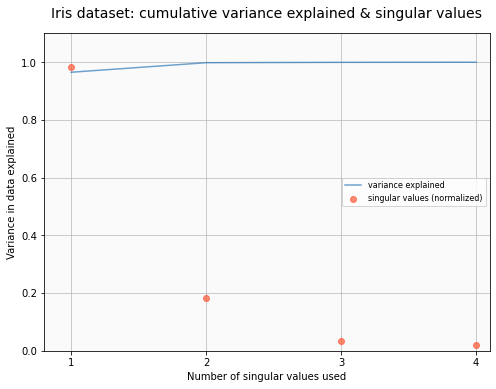

In [23]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_iris,
         cum_var_explained_iris,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv_iris,
            sklearn.preprocessing.normalize(S_iris.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_iris)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Iris dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()
plt.show()

Dimension reduction
Judging from the curve representing cumulative variance explained in the figure above, we can see that

with 1 singular value, about 96.5% of the variance of X can be explained with 2 singular values, that number goes up to 
approximately 99.8% Since graphing the Iris dataset in 1D wouldn't be all that interesting (just dots on a line segment), 
let's try using the first 2 singular values to represent the data on the x - and y -axes, respectively.

In [24]:
# the iris.target gives the actual labels for the data points
# we're just selecting the locations corresponding to data points labeled 0,1,2 resp
# then we can plot those using different colors.

idx_setosa = np.where(iris.target==0)[0]
idx_versicolor = np.where(iris.target==1)[0]
idx_virginica = np.where(iris.target==2)[0]

setosa_x = U_iris[idx_setosa, 0]
setosa_y = U_iris[idx_setosa, 1]

print(setosa_x.shape)

versicolor_x = U_iris[idx_versicolor, 0]
versicolor_y = U_iris[idx_versicolor, 1]

virginica_x = U_iris[idx_virginica, 0]
virginica_y = U_iris[idx_virginica, 1]

(50,)


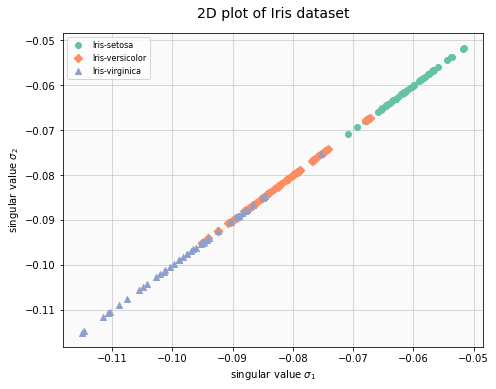

In [25]:
# 1 D plot
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(setosa_x,
            setosa_x,
            marker='o',
            color='#66c2a5',
            label='Iris-setosa',
            zorder=1000)

plt.scatter(versicolor_x,
            versicolor_x,
            marker='D',
            color='#fc8d62',
            label='Iris-versicolor',
            zorder=1000)

plt.scatter(virginica_x,
            virginica_x,
            marker='^',
            color='#8da0cb',
            label='Iris-virginica',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_title('2D plot of Iris dataset',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')

plt.grid(alpha=0.6, zorder=1)
plt.tight_layout()

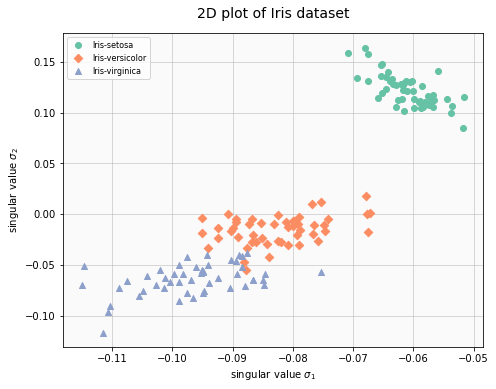

In [26]:
# 2D plot
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(setosa_x,
            setosa_y,
            marker='o',
            color='#66c2a5',
            label='Iris-setosa',
            zorder=1000)

plt.scatter(versicolor_x,
            versicolor_y,
            marker='D',
            color='#fc8d62',
            label='Iris-versicolor',
            zorder=1000)

plt.scatter(virginica_x,
            virginica_y,
            marker='^',
            color='#8da0cb',
            label='Iris-virginica',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_title('2D plot of Iris dataset',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')

plt.grid(alpha=0.6, zorder=1)
plt.tight_layout()

# t-SNE

In [1]:
#Loading libraries
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
import sklearn
iris = sklearn.datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
dct = {'0':'setosa', '1':'versicolor','2':'virginica'}
list_iris = [dct[str(k)] for k in iris.target]
df_iris['Class'] = list_iris
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X = df_iris.iloc[:, 0:4].values
y = df_iris.iloc[:, 4].values

Performing t-SNE

In [6]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X)

C:\Users\chait\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\chait\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.084s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387634
[t-SNE] KL divergence after 1000 iterations: 0.129141


Visualizing t-SNE

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

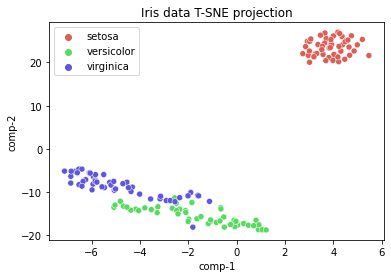

In [7]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection")

CONCLUSION : Hence we have Studied and implemented dimensionality reduction techniques such as LDA SVD  t-SNE on iris dataset 